#Лабораторна робота 1
###Студента групи МІТ-31 (підгрупа 2)
###Луніна Леоніда Олександровича

##Завдання
1. NumPy (створити набір даних (розмір за власним рішенням), провести CRUD операції над даними (скаляр, вектор, матриця)). Використати arange, random.
2. Pandas (створити dataframe різними способами, провести маніпуляції з даними (head, describe, iloc, loc ...))
3. Matplotlib (створити набір даних лінійної функції з урахуванням помилок вимірювань, побудувати графік функції та згенерованих даних, обчислити похибку з використанням метрик MAE, MSE). Записати отримані результати у csv файл (формат: X,Y, Y_hat, mAE, mSE)

4. Відповіді оформити .ipynb документом
5. Викласти у зазначений репозіторій GitHub в окремій папці з назвою Lab1 де має бути .ipynb файл та необхідні файли з даними

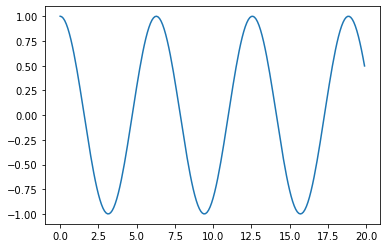

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl

%matplotlib inline

market = mpl.subplots()

#Make array(x,y) according to function
def xy_array(start, count, step, function):
    x = []
    y = []
    stop = start + count * step

    for i in np.arange(start, stop, step):
        x.append(i)
        y.append(function(i))
    
    return np.array(x), np.array(y)

def parabola(x):
    return x ** 2

def sin(x):
    return np.sin(x)

def cos(x):
    return np.cos(x)

def tan(x):
    return np.tanh(x)


def mae(actual, prediction):
    return np.absolute((actual - prediction))    

def mse(actual, prediction):
    return np.square(actual - prediction)


def yhat(x, y):
    b1, b0 = np.polyfit(x, y, 1)
    y_hat = b0 + b1*x
    return y_hat


x, y = xy_array(0, 200, 0.1, cos)
mpl.plot(x, y)

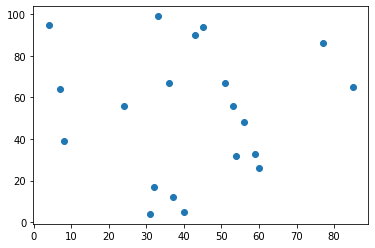

In [83]:
x = np.random.randint(0, 100, 20)
y = np.random.randint(0, 100, 20)
mpl.scatter(x,y)

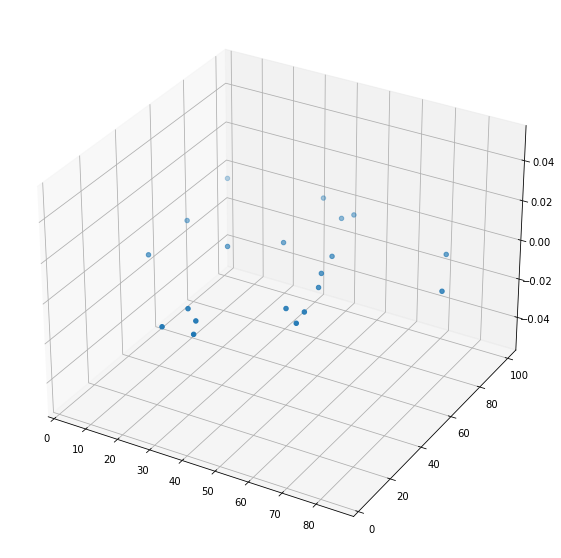

In [84]:
figure = mpl.figure(figsize=(10, 10))
axis3 = figure.add_subplot(111, projection='3d')
axis3.scatter(x, y)

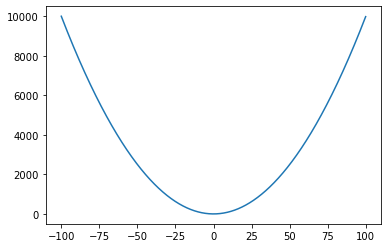

In [85]:
x, y = xy_array(-100, 2000, 0.1, parabola)
mpl.plot(x, y)


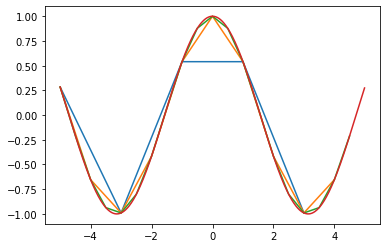

In [86]:
figure, axis = mpl.subplots()

x1, y1 = xy_array(-5, 5, 2, cos)
line1, = axis.plot(x1, y1)

x2, y2 = xy_array(-5, 10, 1, cos)
line2, = axis.plot(x2, y2)

x3, y3 = xy_array(-5, 20, 0.5, cos)
line3, = axis.plot(x3, y3)

x4, y4 = xy_array(-5, 1000, 0.01, cos)
line4, = axis.plot(x4, y4)


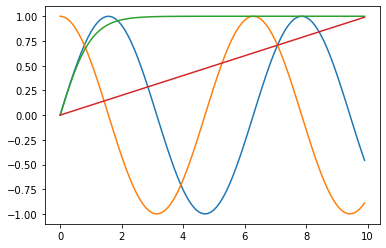

In [87]:

 
figure, axis = mpl.subplots()

x1, y1 = xy_array(0, 100, 0.1, sin)
line1, = axis.plot(x1, y1)

x2, y2 = xy_array(0, 100, 0.1, cos)
line2, = axis.plot(x2, y2)

x3, y3 = xy_array(0, 100, 0.1, tan)
line3, = axis.plot(x3, y3)

x0, y0 = xy_array(0, 100, 0.1, lambda x: x / 10)
line0, = axis.plot(x0, y0)



mean sin(x): 0.49500000000000016
mean cos(x): 0.4949999999999998
mean tanh(x): 0.49500000000000033



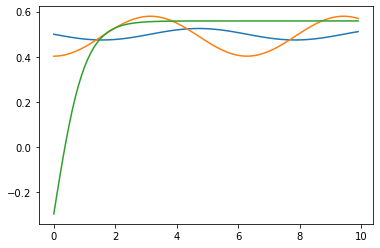

In [88]:
sin_yhat = yhat(y1, y0)
cos_yhat = yhat(y2, y0)
tan_yhat = yhat(y3, y0)


print('mean sin(x):', sin_yhat.mean())
print('mean cos(x):', cos_yhat.mean())
print('mean tanh(x):', tan_yhat.mean())
print()

fig, ax = mpl.subplots()

ax.plot(x1, sin_yhat)
ax.plot(x2, cos_yhat)
ax.plot(x3, tan_yhat)

mean sin(x): 0.6581986859218971
mean cos(x): 0.8170720829271586
mean tanh(x): 0.43060192100717126



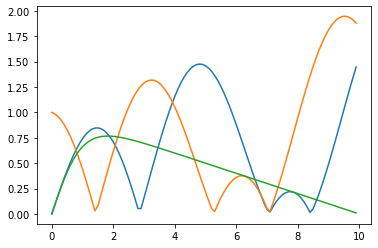

In [89]:
sin_mae = mae(y1, y0)
cos_mae = mae(y2, y0)
tan_mae = mae(y3, y0)


print('mean sin(x):', sin_mae.mean())
print('mean cos(x):', cos_mae.mean())
print('mean tanh(x):', tan_mae.mean())
print()


fig, ax = mpl.subplots()

ax.plot(x1, sin_mae)
ax.plot(x2, cos_mae)
ax.plot(x3, tan_mae)

mean sin(x): 0.6418975488401361
mean cos(x): 0.9897122152672552
mean tanh(x): 0.24155800364703148



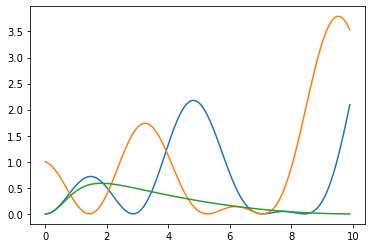

In [90]:
sin_mse = mse(y1, y0)
cos_mse = mse(y2, y0)
tan_mse = mse(y3, y0)


print('mean sin(x):', sin_mse.mean())
print('mean cos(x):', cos_mse.mean())
print('mean tanh(x):', tan_mse.mean())
print()

fig, ax = mpl.subplots()

ax.plot(x1, sin_mse)
ax.plot(x2, cos_mse)
ax.plot(x3, tan_mse)

In [91]:
sin_arr = (x1, y1, sin_yhat, sin_mae, sin_mse)
cos_arr = (x2, y2, cos_yhat, cos_mae, cos_mse)
tan_arr = (x3, y3, tan_yhat, tan_mae, tan_mse)

data = np.column_stack((sin_arr, cos_arr, tan_arr))
data = np.transpose(data, (1, 0))

dframe = pd.DataFrame(data, columns=('X', 'Y', 'Y_hat', 'mAE', 'mSE'))
dframe.to_csv('results_dataframe.csv')